Question: 

Each observation in the provided data set is a web browser (or cookie) in our observed Universe. The goal is to model the behavior of a future purchase and classify cookies into those that will purchase a product from Brand X in the future and those that will not. y_buy is the outcome variable that represents if a cookie made a purchase in the period of interest. All of the rest of the columns in the data set were recorded prior to this purchase and may be used to predict purchase. 


Please create a logistic regression model and another model of your choice to classify these cookies into future buyers or not. Explain your choice of model, how you did model selection, how you validated the quality of the model, and which variables are most informative of purchase. 


The deliverable is a document with text and figures illustrating your thought process, how you began to explore the data, and an evaluation and comparison of the models that you created. As a supplementary deliverable, please also submit your code, in a separate file from your write up. Feel free to use any internet or text resources you like, but please do not discuss or consult with another person. This should take about 6 hours and can be done using any programming language or statistical package (Python or R are preferred).


Field Descriptions:

isbuyer - Past purchaser of product

buy_freq - How many times purchased in the past

visit_freq - How many times visited website in the past hist()

buy_interval - Average time between purchases

sv_interval - Average time between website visits

expected_time_buy - Derived variable

expected_time_visit - Derived variable

last_buy - Days since last purchase.

last_visit - Days since last website visit.

multiple_buy - Derived variable

multiple_visit - Derived variable

uniq_url - Number of unique urls we observed web browser on.

num_checkins - Number of times we observed web browser.

y_buy - Outcome variable of interest, Did they purchase in period of interest.



## Importing some packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *

In [27]:
# opened_file = open('Dstillery_dataset.txt')
# from csv import reader
# read_file = reader(opened_file)
# apps_data = list(read_file)

# with open('Dstillery_dataset.txt','r') as f:
#     shakespeare = f.read().split('\n')


## Load Dataset

In [2]:
df = pd.read_csv('Dstillery_dataset.txt',sep='\t')

In [3]:
df.reset_index(drop=True, inplace = True)

In [4]:
df.head()

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0,NaN,1,0.0,0.0,0.0,0.0000,106,106,0,0,169,2130,0
1,0,NaN,1,0.0,0.0,0.0,0.0000,72,72,0,0,154,1100,0
2,0,NaN,1,0.0,0.0,0.0,0.0000,5,5,0,0,4,12,0
3,0,NaN,1,0.0,0.0,0.0,0.0000,6,6,0,0,150,539,0
4,0,NaN,2,0.0,0.5,0.0,-101.1493,101,101,0,1,103,362,0


## Exploring the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54584 entries, 0 to 54583
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isbuyer              54584 non-null  int64  
 1   buy_freq             2327 non-null   float64
 2   visit_freq           54584 non-null  int64  
 3   buy_interval         54584 non-null  float64
 4   sv_interval          54584 non-null  float64
 5   expected_time_buy    54584 non-null  float64
 6   expected_time_visit  54584 non-null  float64
 7   last_buy             54584 non-null  int64  
 8   last_visit           54584 non-null  int64  
 9   multiple_buy         54584 non-null  int64  
 10  multiple_visit       54584 non-null  int64  
 11  uniq_urls            54584 non-null  int64  
 12  num_checkins         54584 non-null  int64  
 13  y_buy                54584 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 5.8 MB


In [6]:
df.describe()

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
count,54584.000000,2327.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000
mean,0.042632,1.240653,1.852777,0.210008,5.825610,-0.198040,-10.210786,64.729335,64.729335,0.006357,0.277444,86.569343,720.657592,0.004635
std,0.202027,0.782228,2.921820,3.922016,17.595442,4.997792,31.879722,53.476658,53.476658,0.079479,0.447742,61.969765,1275.727306,0.067924
min,0.000000,1.000000,0.000000,0.000000,0.000000,-181.923800,-187.615600,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000,30.000000,127.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,51.000000,51.000000,0.000000,0.000000,75.000000,319.000000,0.000000
75%,0.000000,1.000000,2.000000,0.000000,0.104167,0.000000,0.000000,105.000000,105.000000,0.000000,1.000000,155.000000,802.000000,0.000000
max,1.000000,15.000000,84.000000,174.625000,184.916700,84.285710,91.401920,188.000000,188.000000,1.000000,1.000000,206.000000,37091.000000,1.000000


In [7]:
# deploy a function that return value_counts for all the attributes
value__counts(df)

0    52257
1     2327
Name: isbuyer, dtype: int64
1.0     1980
2.0      244
3.0       55
4.0       20
5.0       17
6.0        5
7.0        2
11.0       2
15.0       1
8.0        1
Name: buy_freq, dtype: int64
1     39358
2      7697
3      2879
4      1358
5       810
      ...  
65        1
50        1
43        1
84        1
60        1
Name: visit_freq, Length: 64, dtype: int64
0.000000      54237
0.041667         17
0.083333          3
0.125000          3
3.041667          3
              ...  
170.833300        1
7.583333          1
31.583330         1
20.638890         1
9.958333          1
Name: buy_interval, Length: 295, dtype: int64
0.000000      39440
0.041667       1319
0.083333        145
0.125000        107
1.000000         67
              ...  
1.627451          1
92.750000         1
3.937500          1
140.000000        1
12.822920         1
Name: sv_interval, Length: 5886, dtype: int64
 0.000000      54237
-133.628200        1
-27.771500         1
 80.404080         1


### After exploring the db I discover:
- is_buyer is a binary variable 0 new buyer, 1 buy the product
- buy_freq has many null values
- last_buy and last_visit contains very similar information.
- uniq_urls the min value is -1, this can be a placeholder becuase you can not be a negative number.
- Target value is imbalance, It needs to be balance before implemening the models.

## Checking for null values in the df

In [7]:
df.isnull().sum() 
# buy_freq feature has a hight amount of null values

isbuyer                    0
buy_freq               52257
visit_freq                 0
buy_interval               0
sv_interval                0
expected_time_buy          0
expected_time_visit        0
last_buy                   0
last_visit                 0
multiple_buy               0
multiple_visit             0
uniq_urls                  0
num_checkins               0
y_buy                      0
dtype: int64

## Drop buy_freq feature 


- I'm not going to include the attribute buy_freq in my future analysis becuase of the higer percentage of null values. If the percentage of the values was't too hight I could replace the values by the mediam, but its not the case.

In [8]:
df.drop(['buy_freq'], axis=1, inplace = True)


In [9]:
df.head()

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0,1,0.0,0.0,0.0,0.0000,106,106,0,0,169,2130,0
1,0,1,0.0,0.0,0.0,0.0000,72,72,0,0,154,1100,0
2,0,1,0.0,0.0,0.0,0.0000,5,5,0,0,4,12,0
3,0,1,0.0,0.0,0.0,0.0000,6,6,0,0,150,539,0
4,0,2,0.0,0.5,0.0,-101.1493,101,101,0,1,103,362,0


## Checking for duplicates values

In [10]:
# removing duplicates 
duplicates = df[df.duplicated(keep = False)]
len(duplicates)


516

- Duplicates can be a result of the product being buy another time by the same user. Therefore do not need to delete.

## Removing duplicates values

In [10]:
df.drop_duplicates(keep=False,inplace = True)
len(df)

54068

## Multicollinearity of features

In [11]:
df.corr()[abs(df.corr()>.85)]


,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
isbuyer,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visit_freq,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buy_interval,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sv_interval,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expected_time_buy,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expected_time_visit,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_buy,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
last_visit,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
multiple_buy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
multiple_visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


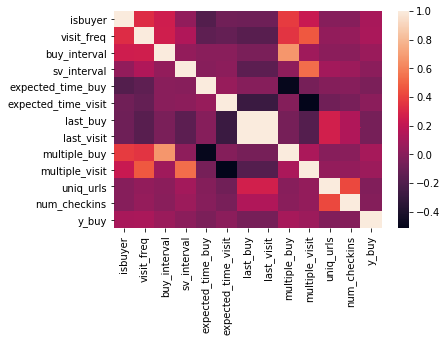

In [11]:
corr_matrix=df.corr()
ax = sns.heatmap(corr_matrix)

- Higher correleted featrures are last_buy and last_visit, the need to be remove from the df becuase both features contain the same information.


In [12]:
df.drop(['last_buy','last_visit'], axis=1, inplace = True)


In [13]:
df.head()

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0,1,0.0,0.0,0.0,0.0000,0,0,169,2130,0
1,0,1,0.0,0.0,0.0,0.0000,0,0,154,1100,0
2,0,1,0.0,0.0,0.0,0.0000,0,0,4,12,0
3,0,1,0.0,0.0,0.0,0.0000,0,0,150,539,0
4,0,2,0.0,0.5,0.0,-101.1493,0,1,103,362,0


## Replace negative values in uniq_urls feature with the median

In [5]:
df['uniq_urls'] = df['uniq_urls'].replace(-1, np.nan)
df['uniq_urls'] = df['uniq_urls'].fillna(df['uniq_urls'].median())

<IPython.core.display.Javascript object>

In [6]:
df.describe()

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
count,54584.000000,2327.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000
mean,0.042632,1.240653,1.852777,0.210008,5.825610,-0.198040,-10.210786,64.729335,64.729335,0.006357,0.277444,87.749689,720.657592,0.004635
std,0.202027,0.782228,2.921820,3.922016,17.595442,4.997792,31.879722,53.476658,53.476658,0.079479,0.447742,61.026217,1275.727306,0.067924
min,0.000000,1.000000,0.000000,0.000000,0.000000,-181.923800,-187.615600,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000,32.000000,127.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,51.000000,51.000000,0.000000,0.000000,77.000000,319.000000,0.000000
75%,0.000000,1.000000,2.000000,0.000000,0.104167,0.000000,0.000000,105.000000,105.000000,0.000000,1.000000,155.000000,802.000000,0.000000
max,1.000000,15.000000,84.000000,174.625000,184.916700,84.285710,91.401920,188.000000,188.000000,1.000000,1.000000,206.000000,37091.000000,1.000000


## Exploratory Data Analysis

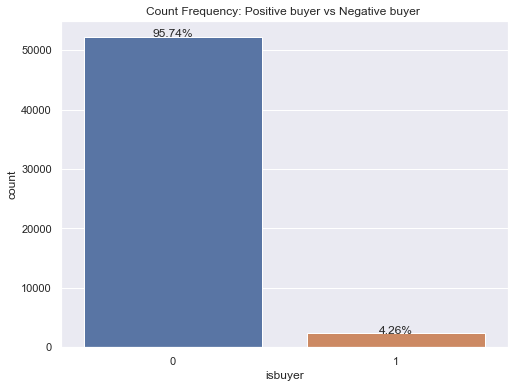

In [7]:
count_freq_plot(df,"isbuyer", "buyer", True)

- The mayority of the users didnt buy the product in the past. They are new buyers.

Text(0.5, 0, 'Avg of visit_freq')

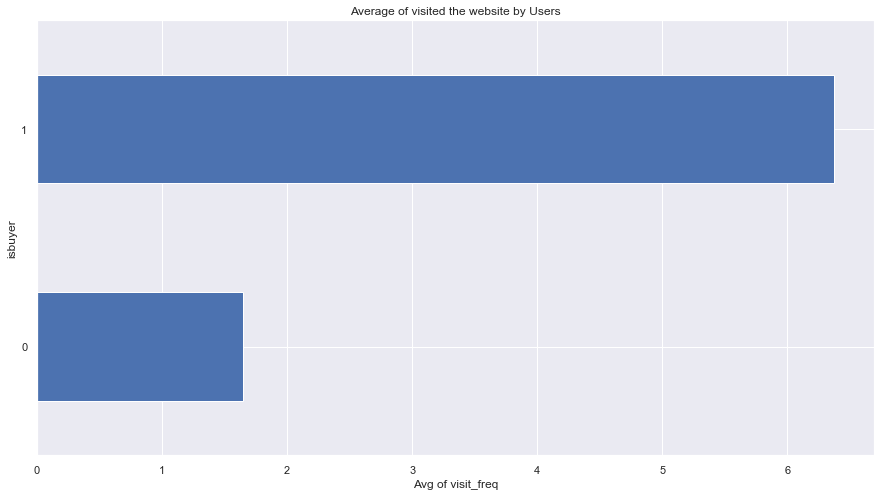

In [8]:
df.groupby(['isbuyer'])['visit_freq'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Average of visited the website by Users')
plt.xlabel("Avg of visit_freq")

# the mean num_checkins by isbuyer

# New Buyers havent visit the website in the past.
# buyers that purchaser the product in the past visit the website more often

- Buyers that purchaser the product in the past visit the website more often

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, '# of visit_freq')

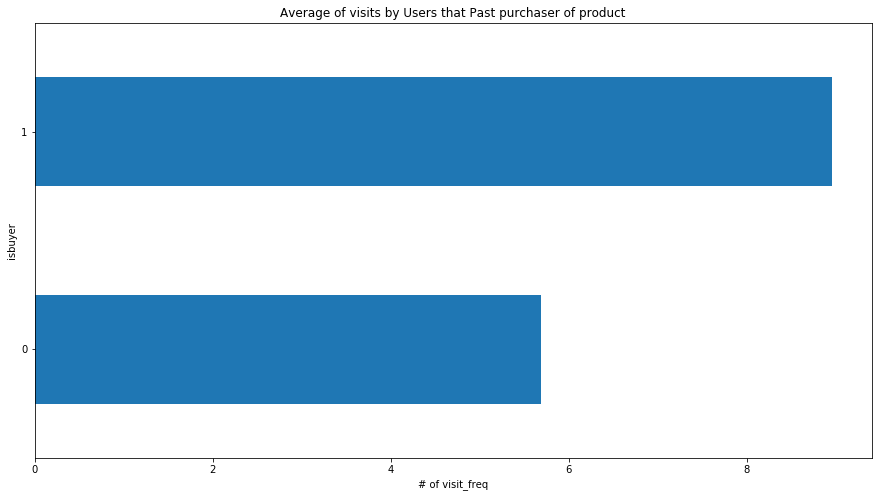

In [14]:
df.groupby(['isbuyer'])['sv_interval'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Average of visits by Users that Past purchaser of product')
plt.xlabel("# of visit_freq")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, '# of visit_freq')

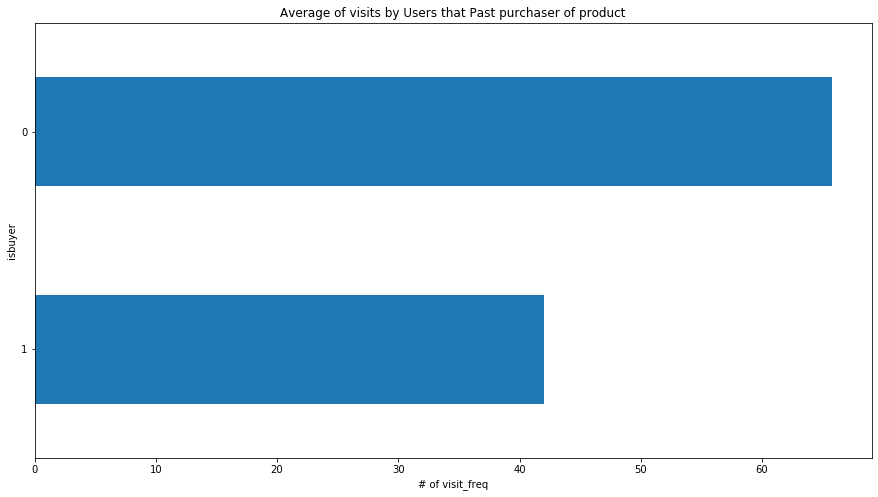

In [17]:
df.groupby(['isbuyer'])['last_buy'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Average of visits by Users that Past purchaser of product')
plt.xlabel("# of visit_freq")

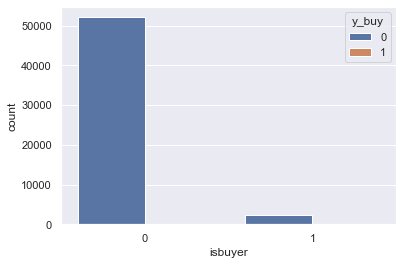

In [16]:
sns.countplot(x = 'isbuyer', hue = 'y_buy', data = df)

In [18]:
df.groupby(['isbuyer'])['last_buy'].mean()

isbuyer
0    65.741317
1    42.003438
Name: last_buy, dtype: float64

In [44]:
df['uniq_urls'].unique(.sum()

21121.0

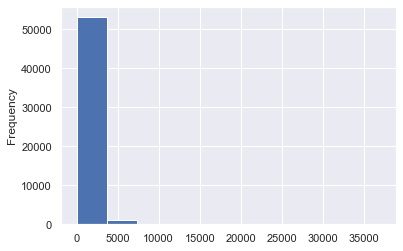

In [33]:
df['num_checkins'].plot.hist()

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Tweet Lenght')

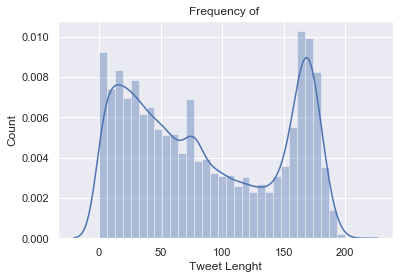

In [46]:
for col in df[col]:
    sns.distplot(df['uniq_urls'])
    plt.title("Frequency of ")
    plt.ylabel('Count')
    plt.xlabel('Tweet Lenght')

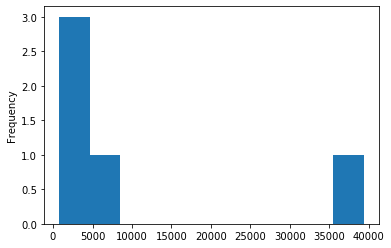

In [51]:
df['visit_freq'].value_counts()[:5].plot.hist()

- The mayority of the users visit the page one time in the past

In [23]:
df['visit_freq'].value_counts()

1     39358
2      7697
3      2879
4      1358
5       810
      ...  
65        1
50        1
43        1
84        1
60        1
Name: visit_freq, Length: 64, dtype: int64

In [25]:
df.columns

Field Descriptions:

isbuyer - Past purchaser of product

visit_freq - How many times visited website in the past

buy_interval - Average time between purchases

sv_interval - Average time between website visits

expected_time_buy - Derived variable

expected_time_visit - Derived variable

last_buy - Days since last purchase.

last_visit - Days since last website visit.

multiple_buy - Derived variable

multiple_visit - Derived variable

uniq_url - Number of unique urls we observed web browser on.

num_checkins - Number of times we observed web browser.

y_buy - Outcome variable of interest, Did they purchase in period of interest.

Index(['isbuyer', 'visit_freq', 'buy_interval', 'sv_interval',
       'expected_time_buy', 'expected_time_visit', 'multiple_buy',
       'multiple_visit', 'uniq_urls', 'num_checkins', 'y_buy'],
      dtype='object')

In [26]:
df.tail()

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
54579,0,3,0.0,30.979170,0.0,12.621240,0,1,168,2080,0
54580,0,2,0.0,1.041667,0.0,-0.916713,0,1,1,15,0
54581,0,1,0.0,0.000000,0.0,0.000000,0,0,132,556,0
54582,0,1,0.0,0.000000,0.0,0.000000,0,0,71,400,0
54583,0,1,0.0,0.000000,0.0,0.000000,0,0,77,401,0


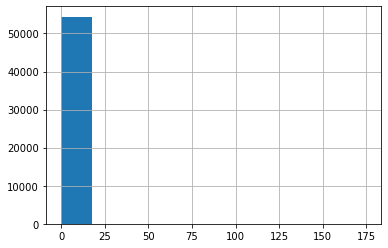

In [54]:
df['buy_interval'].hist()

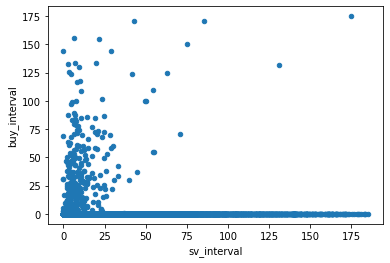

In [52]:
df.plot('sv_interval', 'buy_interval', kind='scatter')

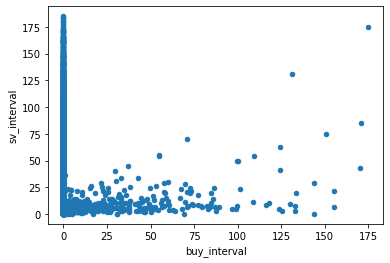

In [53]:
df.plot('buy_interval', 'sv_interval', kind='scatter')

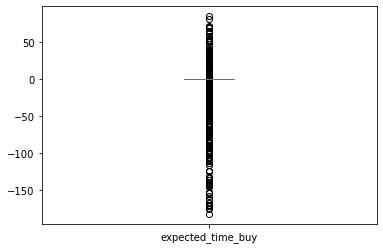

In [31]:
df['expected_time_buy'].plot.box()

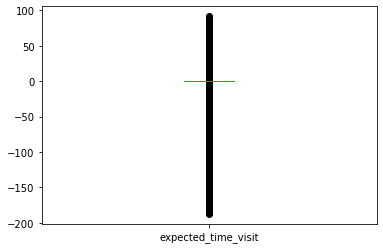

In [32]:
df['expected_time_visit'].plot.box()

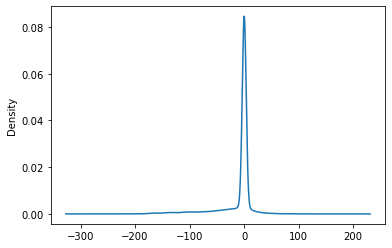

In [33]:
df['expected_time_visit'].plot.kde()

In [34]:
df['uniq_urls'].value_counts()

-1      826
 0      707
 171    628
 169    611
 168    580
       ... 
 202      1
 203      1
 204      1
 205      1
 206      1
Name: uniq_urls, Length: 207, dtype: int64

In [35]:
df['num_checkins'].value_counts()

70      148
45      146
67      141
30      140
57      140
       ... 
4458      1
2843      1
4205      1
6539      1
5337      1
Name: num_checkins, Length: 4628, dtype: int64

In [41]:
df[df['uniq_urls']== -1]

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
23,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,26,0
50,0,2,0.0,0.375000,0.0,-1.345821,0,1,-1,359,0
72,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,99,0
118,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,364,0
158,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,414,0
...,...,...,...,...,...,...,...,...,...,...,...
54327,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,343,0
54409,0,2,0.0,0.041667,0.0,-73.160350,0,1,-1,20,0
54437,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,391,0
54497,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,1297,0


In [19]:
# def count_freq(df, col ,want_percentages = False):
#     " it retuns a bar plot with the percentages or w/o percentages"
    
#     sns.set(style="darkgrid")
#     plt.figure(figsize=(8,6))
#     total = float(len(df)) 
#     ax = sns.countplot(x=col, data=df, dodge =False) # for Seaborn version 0.7 and more
#     ax.set(xlabel='target', title= 'Count Frequency: Positive Pursaches vs Negative Pursaches ')


#     if want_percentages == True:
#         for p in ax.patches:
#             height = p.get_height()
#             ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2%}'.format(height/total),ha="center") 

#         plt.show()

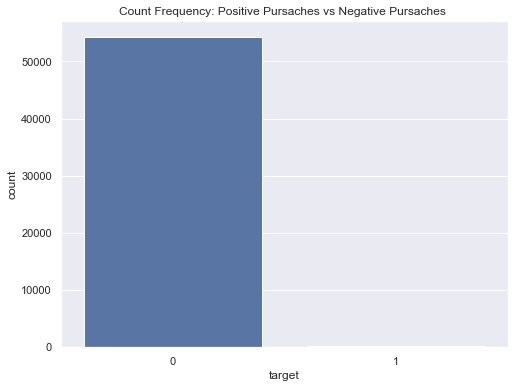

In [20]:
count_freq(df,"y_buy")

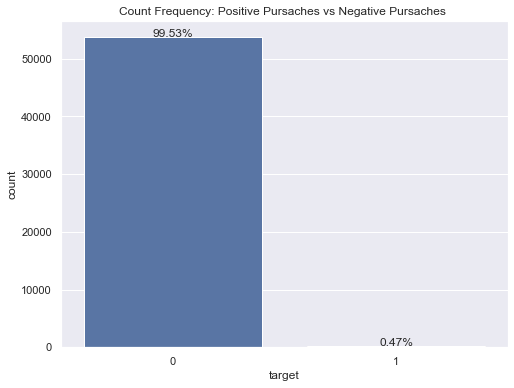

In [16]:
 plot_with_percentages(df,"y_buy")

Text(0, 0.5, 'Number of purchases')

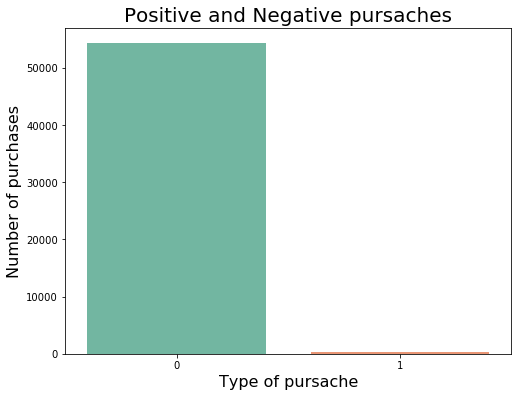

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x="y_buy", data=df, palette='Set2')
plt.title('Positive and Negative pursaches',fontsize=20)
plt.xlabel('Type of pursache', fontsize=16)
plt.ylabel('Number of purchases', fontsize=16)


In [14]:
# create a new feature called label
df['label'] = ['not_buy' if x == 0  else 'buy' for x in df['y_buy']]


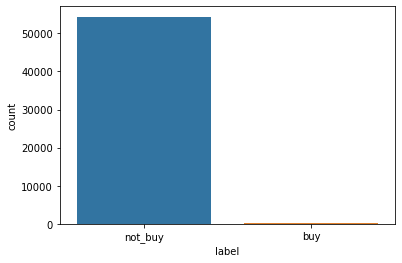

In [25]:
sns.countplot(x="label", data=df)